<h1 style="text-align: center;">Libraries and networks of knowledge: <br/>Using Wikipedia, Wikidata, and archival evidence to reconstruct network of Jacques Derrida</h1>

In [73]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from urllib.request import urlopen
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.set_option("display.max_columns", 500)

## Overview

This project represents an intitial attempt to use archival evidence to validate and explore the Wikipedia link network associated with the French philosopher Jacques Derrida. A sample of books with personal dedications from other intellectuals to Derrida was selected from Derrida's personal library, now held by Princeton University. The hypothesis was that these "dedicator nodes" would be useful as reference points in analyzing Derrida's ego network, as encoded in Wikipedia. The project dataset was constructed in several steps:

1. A sample of 150 dedicators was identified and names were reconciled against URIs in the Virtual International Authority File ([VIAF](https://viaf.org/)). From VIAF, Wikidata identifiers were extracted for these nodes.

2. Wikidata lookups were performed to identify the 62 different biographical pages that exist for Derrida across the 285 different language editions of Wikipedia. Links were scraped from these pages and each link was checked in Wikidata to filter out irrelevant nodes. Two filtering criteria were applied: (1) the link must represent a person and (2) that person must have been born after 1889, in order to reasonably overlap with Derrida's own life.

3. A second iteration of link scraping and lookups was performed to harvest the links from the Wikipedia pages for the filtered nodes linked from the Derrida pages.

4. A separate round of two-step harvesting was performed for all of the pages that linked _to_ one of Derrida's pages, again searching across all of the relevant Wikipedia language editions. The [Wikipedia backlink API](https://en.wikipedia.org/wiki/Special:ApiSandbox#action=query&format=xml&list=backlinks&bltitle=Jacques+Derrida&blnamespace=0&bllimit=500) was used to easily identify these links.

The final combined network contained 13105 nodes and 24780 weighted edges.

In [74]:
G = nx.read_graphml(urlopen("https://raw.githubusercontent.com/timathom/netsci/master/project/data/full/full.graphml"))
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 13105
Number of edges: 24780
Average in degree:   1.8909
Average out degree:   1.8909


In [92]:
# Add network nodes to a list
graph = [G.node[n] for n in G.nodes_iter()]

# Create DataFrame from list
df = pd.DataFrame(graph)
df.fillna(0, inplace=True)
ego_net = df[df.loc[:, "ego"] == True]
dedicators = df[df.loc[:, "dedicator"] == True]

dedicators.head()

,Clustering Coefficient,Component ID,Degree,Eigenvector Centrality,In-Degree,Modularity Class,Out-Degree,Strongly-Connected ID,b,dedicator,ego,g,label,lang-af,lang-als,lang-an,lang-ar,lang-arz,lang-ast,lang-ay,lang-az,lang-ba,lang-be,lang-be-tarask,lang-bg,lang-bn,lang-br,lang-bs,lang-ca,lang-ce,lang-ckb,lang-co,lang-cs,lang-cy,lang-da,lang-de,lang-el,lang-en,lang-eo,lang-es,lang-et,lang-eu,lang-fa,lang-fi,lang-fo,lang-fr,lang-fy,lang-ga,lang-gd,lang-gl,lang-gv,lang-he,lang-hi,lang-hif,lang-hr,lang-hu,lang-hy,lang-ia,lang-id,lang-ilo,lang-io,lang-is,lang-it,lang-ja,lang-jv,lang-ka,lang-kk,lang-kn,lang-ko,lang-ksh,lang-ku,lang-la,lang-lb,lang-li,lang-lmo,lang-lt,lang-lv,lang-mk,lang-ml,lang-mn,lang-mr,lang-ms,lang-mwl,lang-my,lang-nap,lang-nds,lang-nl,lang-nn,lang-no,lang-nrm,lang-oc,lang-or,lang-os,lang-pa,lang-pcd,lang-pl,lang-pnb,lang-pt,lang-qu,lang-ro,lang-ru,lang-rue,lang-sa,lang-sc,lang-scn,lang-sco,lang-sh,lang-simple,lang-sk,lang-sl,lang-so,lang-sq,lang-sr,lang-sv,lang-sw,lang-ta,lang-te,lang-th,lang-tl,lang-tr,lang-tt,lang-uk,lang-ur,lang-uz,lang-vec,lang-vi,lang-vls,lang-vo,lang-war,lang-wuu,lang-xmf,lang-yi,lang-yo,lang-zh,lang-zh-min-nan,lang-zh-yue,lang-zu,r,size,wiki degree,x,y
0,0.000000,0,10,0.000471,1,1,9,10680,255,1,1,196,Richard A. Macksey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000471,1,0.236283,0.468625
3,0.071429,0,294,0.356235,121,1,173,10680,255,1,1,196,Roland Barthes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.356235,53,0.361828,0.351351
5,0.000000,1,3,0.000000,0,0,3,10684,0,1,0,0,Ernst Behler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,1,0.145997,0.758153
11,0.000000,0,13,0.007751,3,0,10,10680,0,1,0,0,Alain Suied,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.007751,2,0.282101,0.541904
14,0.000000,0,16,0.004188,2,0,14,10680,0,1,0,0,M. H. Abrams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

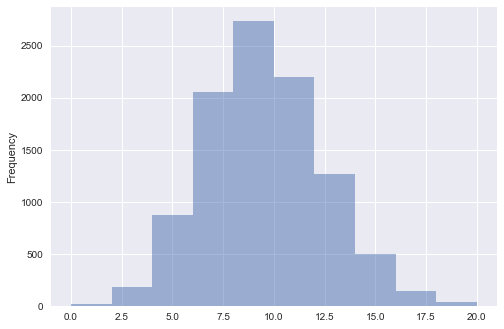

In [82]:
# Define simulation function to randomly assign dedicator labels
def simulate(dfs, dist):
   
    dtest = dfs["dedicator"] == 1       
    dedicators = dfs[dtest].copy()           
    dedicators["dedicator"] = np.random.choice(dfs.index, len(dedicators))    
    d = dfs.iloc[dedicators["dedicator"]]    
    etest = d["ego"] == 1
    dist["ego"].append(len(d[etest]))
    
simulation = df.copy()

# Initialize a dictionary to hold the results
distribution = {"ego": []}

# Run the simulation
for i in range(10000):
    simulate(simulation, distribution)

result = distribution
dfr = pd.DataFrame(result)

# Plot the result
plt.figure();
dfr.loc[:, "ego"].plot.hist(alpha = 0.5)

plt.show()


In [91]:
# Print summary data

percent_total = len(dedicators)/len(df)
percent_ego = len(ego_net[ego_net.loc[:, "dedicator"] == True])/len(ego_net)


summary = pd.DataFrame.from_dict({"Total dedicators": [len(dedicators)],
    "Nodes in ego network": [len(ego_net)],
    "Dedicators in ego network": [len(ego_net[ego_net.loc[:, "dedicator"] == True])],
    "Proportion of dedicators (total)": [percent_total],
    "Proportion of dedicators (ego)": [percent_ego],
    "Mean dedicators in ego network under null model": [np.mean(dfr.loc[:, "ego"])]
})

summary

,Dedicators in ego network,Mean dedicators in ego network under null model,Nodes in ego network,Proportion of dedicators (ego),Proportion of dedicators (total),Total dedicators
0,47,9.0265,740,0.063514,0.012209,160


In [68]:
# Likelihood of seeing a number greater than or equal to 47 in a set of 740 nodes with a probability of 0.01.
round(1 - binom.cdf(46, 740, 0.01), 4)

0.0